<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Wrangling Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be performing data wrangling.


## Objectives


In this lab you will perform the following:


-   Identify duplicate values in the dataset.

-   Remove duplicate values from the dataset.

-   Identify missing values in the dataset.

-   Impute the missing values in the dataset.

-   Normalize data in the dataset.


<hr>


## Hands on Lab


Import pandas module.


In [248]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr


Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [250]:
# from pyodide.http import pyfetch

# async def download(url, filename):
#     response = await pyfetch(url)
#     if response.status == 200:
#         with open(filename, "wb") as f:
#             f.write(await response.bytes())

In [251]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m1_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [252]:
# await download(file_path, "m1_survey_data.csv")
# file_name="m1_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [253]:
# df = pd.read_csv('m1_survey_data.csv')

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [254]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m1_survey_data.csv")

## Finding duplicates


In this section you will identify duplicate values in the dataset.


 Find how many duplicate rows exist in the dataframe.


In [255]:
# your code goes here
len(df[df.duplicated()])


154

## Removing duplicates


Remove the duplicate rows from the dataframe.


In [256]:
# your code goes here
df.drop_duplicates(inplace=True)


Verify if duplicates were actually dropped.


In [257]:
# your code goes here
len(df[df.duplicated()])


0

In [258]:
len(df)

11398

In [259]:
df.Respondent.nunique()

11398

In [260]:
df.Country.isnull().sum()

0

## Finding Missing values


Find the missing values for all columns.


In [261]:
# your code goes here
df.isnull().sum()

Respondent        0
MainBranch        0
Hobbyist          0
OpenSourcer       0
OpenSource       81
               ... 
Sexuality       542
Ethnicity       675
Dependents      140
SurveyLength     19
SurveyEase       14
Length: 85, dtype: int64

Find out how many rows are missing in the column 'WorkLoc'


In [262]:
# your code goes here
df.WorkLoc.isnull().sum()

32

In [263]:
df[df.Respondent.duplicated()]

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase


## Imputing missing values


Find the  value counts for the column WorkLoc.


In [264]:
# your code goes here

df.WorkLoc.value_counts()

WorkLoc
Office                                            6806
Home                                              3589
Other place, such as a coworking space or cafe     971
Name: count, dtype: int64

In [265]:
df.Employment.value_counts()

Employment
Employed full-time    10968
Employed part-time      430
Name: count, dtype: int64

In [266]:
df.UndergradMajor.value_counts()

UndergradMajor
Computer science, computer engineering, or software engineering          6953
Information systems, information technology, or system administration     794
Another engineering discipline (ex. civil, electrical, mechanical)        759
Web development or web design                                             410
A natural science (ex. biology, chemistry, physics)                       403
Mathematics or statistics                                                 372
A business discipline (ex. accounting, finance, marketing)                244
A social science (ex. anthropology, psychology, political science)        210
A humanities discipline (ex. literature, history, philosophy)             207
Fine arts or performing arts (ex. graphic design, music, studio art)      161
I never declared a major                                                  124
A health science (ex. nursing, pharmacy, radiology)                        24
Name: count, dtype: int64

In [267]:
df.ConvertedComp

0         61000.0
1         95179.0
2         90000.0
3        455352.0
4         65277.0
           ...   
11547    130000.0
11548     19880.0
11549    105000.0
11550     80371.0
11551         NaN
Name: ConvertedComp, Length: 11398, dtype: float64

In [268]:
df.CompFreq.nunique()

3

In [269]:
df.CompFreq.value_counts()

CompFreq
Yearly     6073
Monthly    4788
Weekly      331
Name: count, dtype: int64

Identify the value that is most frequent (majority) in the WorkLoc column.


In [270]:
#make a note of the majority value here, for future reference
#

Impute (replace) all the empty rows in the column WorkLoc with the value that you have identified as majority.


In [271]:
# your code goes here
df.WorkLoc=df.WorkLoc.replace(np.nan,'Office')

After imputation there should ideally not be any empty rows in the WorkLoc column.


Verify if imputing was successful.


In [272]:
# your code goes here
df.WorkLoc.isnull().sum()

0

## Normalizing data


There are two columns in the dataset that talk about compensation.

One is "CompFreq". This column shows how often a developer is paid (Yearly, Monthly, Weekly).

The other is "CompTotal". This column talks about how much the developer is paid per Year, Month, or Week depending upon his/her "CompFreq". 

This makes it difficult to compare the total compensation of the developers.

In this section you will create a new column called 'NormalizedAnnualCompensation' which contains the 'Annual Compensation' irrespective of the 'CompFreq'.

Once this column is ready, it makes comparison of salaries easy.


<hr>


List out the various categories in the column 'CompFreq'


In [273]:
# your code goes here
df.CompFreq.unique()

array(['Yearly', 'Monthly', 'Weekly', nan], dtype=object)

Create a new column named 'NormalizedAnnualCompensation'. Use the hint given below if needed.


Double click to see the **Hint**.

<!--

Use the below logic to arrive at the values for the column NormalizedAnnualCompensation.

If the CompFreq is Yearly then use the exising value in CompTotal
If the CompFreq is Monthly then multiply the value in CompTotal with 12 (months in an year)
If the CompFreq is Weekly then multiply the value in CompTotal with 52 (weeks in an year)

-->


In [274]:
def NormalizedAnnualComp(row):
    if row['CompFreq']=='Yearly':
        value=row['CompTotal']
    elif row['CompFreq']=='Monthly':
        value=row['CompTotal']*12
    else:
        value=row['CompTotal']*52
    return value


In [275]:
# your code goes here

df['NormalizedAnnualCompensation']=df.apply(NormalizedAnnualComp,axis=1)


In [276]:
df.NormalizedAnnualCompensation.median()

100000.0

In [277]:
df.ConvertedComp

0         61000.0
1         95179.0
2         90000.0
3        455352.0
4         65277.0
           ...   
11547    130000.0
11548     19880.0
11549    105000.0
11550     80371.0
11551         NaN
Name: ConvertedComp, Length: 11398, dtype: float64

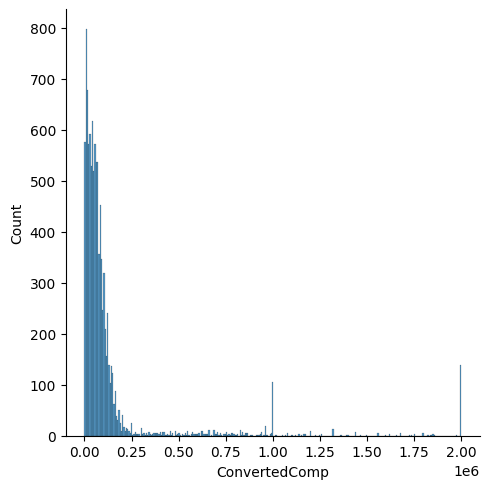

In [278]:
# Plot the distribution curve for the column ConvertedComp
sns.displot(df,x='ConvertedComp')
plt.show()

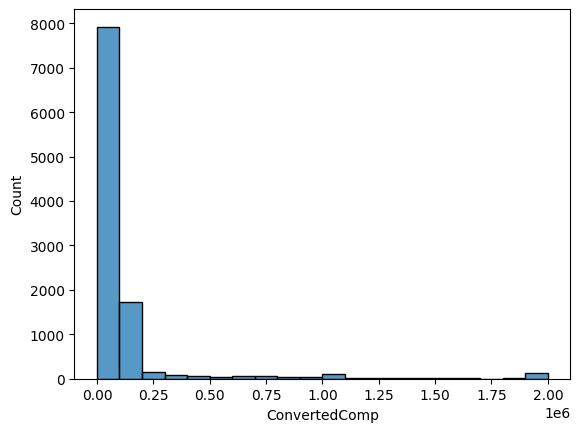

In [279]:
#Plot the histogram for the column `ConvertedComp`.

sns.histplot(df,x='ConvertedComp',bins=20)
plt.show()

In [280]:
# What is the median of the column ConvertedComp?

df.ConvertedComp.median()

57745.0

In [281]:
df.Age.median()

29.0

In [282]:
#How many responders identified themselves only as a Man?
df.Gender.value_counts()

Gender
Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: count, dtype: int64

In [283]:
#Find out the median ConvertedComp of responders identified themselves only as a Woman?

df[df.Gender=='Woman'].ConvertedComp.median()

57708.0

<Axes: xlabel='Age'>

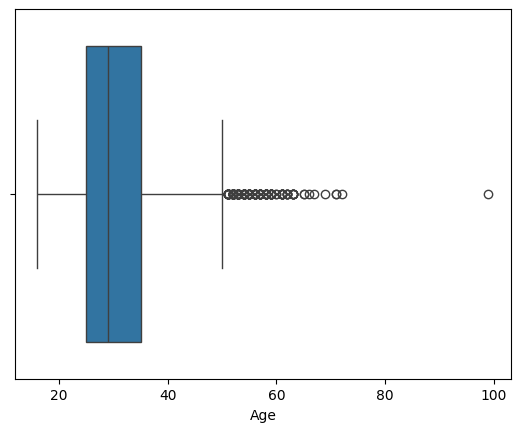

In [284]:
sns.boxplot(data=df,x='Age')

In [285]:
df.Age.dtypes

dtype('float64')

In [286]:
df.Age=df.Age.replace(np.nan,df.Age.median())

In [287]:
q1=np.percentile(df['Age'],25)
q3=np.percentile(df['Age'],75)
q2=df.Age.median()
minimum=df.Age.min()
maximum=df.Age.max()

minimum,q1,q2,q3,maximum

(16.0, 26.0, 29.0, 34.0, 99.0)

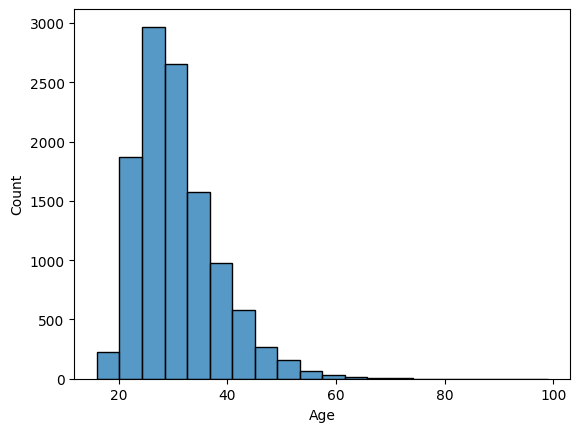

In [288]:
sns.histplot(data=df,x='Age',bins=20)
plt.show()

In [289]:
df.ConvertedComp.median()

57745.0

In [290]:
df.ConvertedComp=df.ConvertedComp.replace(np.nan,df.ConvertedComp.median())

In [291]:
q1=np.percentile(df['ConvertedComp'],25)
q3=np.percentile(df['ConvertedComp'],75)
q2=df.ConvertedComp.median()
minimum=df.ConvertedComp.min()
maximum=df.ConvertedComp.max()

minimum,q1,q2,q3,maximum

(0.0, 29016.0, 57745.0, 95000.0, 2000000.0)

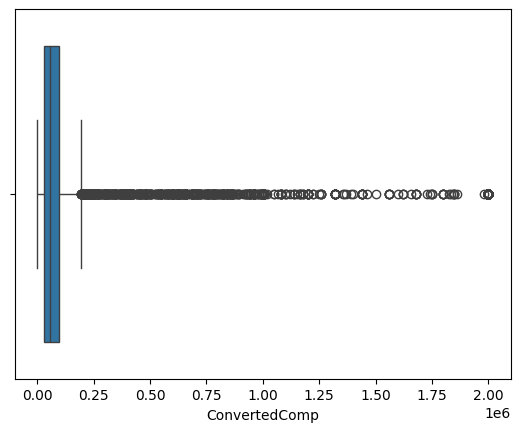

In [292]:
sns.boxplot(data=df,x='ConvertedComp')
plt.show()

In [293]:
iqr=q3-q1

In [294]:
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)

In [295]:
len(df[df.ConvertedComp>upper_limit])

933

In [296]:
len(df[df.ConvertedComp<=lower_limit])

0

In [297]:
dfnew=df[df.ConvertedComp<upper_limit]

In [298]:
dfnew.ConvertedComp.median()

57287.0

In [299]:
df.select_dtypes(exclude='object').corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age,NormalizedAnnualCompensation
Respondent,1.000000,-0.013490,0.002468,-0.015314,0.004621,0.004282,0.000372
CompTotal,-0.013490,1.000000,0.001031,0.003510,0.007063,0.007190,0.862977
ConvertedComp,0.002468,0.001031,1.000000,0.020489,-0.034760,0.101777,0.012898
WorkWeekHrs,-0.015314,0.003510,0.020489,1.000000,0.026517,0.036897,0.005783
CodeRevHrs,0.004621,0.007063,-0.034760,0.026517,1.000000,-0.021086,0.015095
Age,0.004282,0.007190,0.101777,0.036897,-0.021086,1.000000,-0.004787
NormalizedAnnualCompensation,0.000372,0.862977,0.012898,0.005783,0.015095,-0.004787,1.000000


<Axes: xlabel='ConvertedComp', ylabel='Count'>

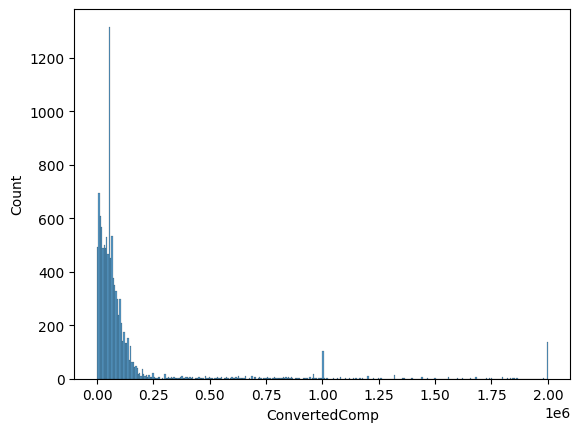

In [300]:
sns.histplot(df,x='ConvertedComp')

<Axes: xlabel='Age'>

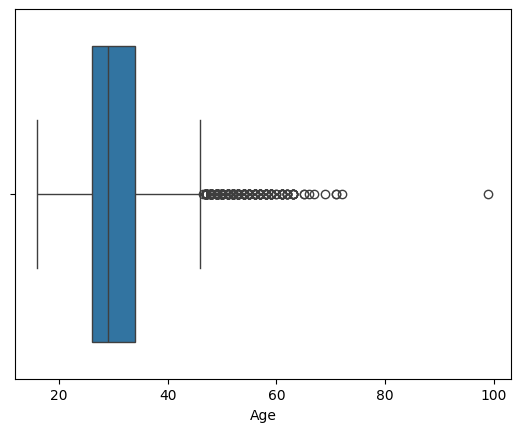

In [301]:
sns.boxplot(df,x='Age')

<Axes: xlabel='WorkWeekHrs', ylabel='WorkWeekHrs'>

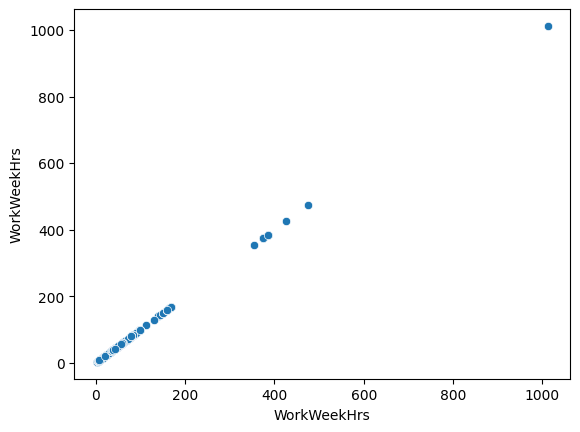

In [302]:
sns.scatterplot(data=df,x='WorkWeekHrs',y='WorkWeekHrs')

<Axes: xlabel='WorkWeekHrs', ylabel='WorkWeekHrs'>

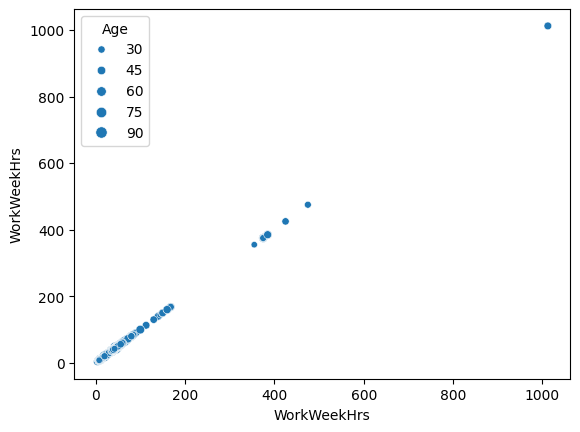

In [303]:
sns.scatterplot(data=df,x='WorkWeekHrs',y='WorkWeekHrs',size='Age')

In [305]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource',
       'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor',
       'EduOther', 'OrgSize', 'DevType', 'YearsCode', 'Age1stCode',
       'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney',
       'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt', 'FizzBuzz',
       'JobFactors', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc',
       'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkPlan',
       'WorkChallenge', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev',
       'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat',
       'LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'BetterLife'

<Axes: ylabel='count'>

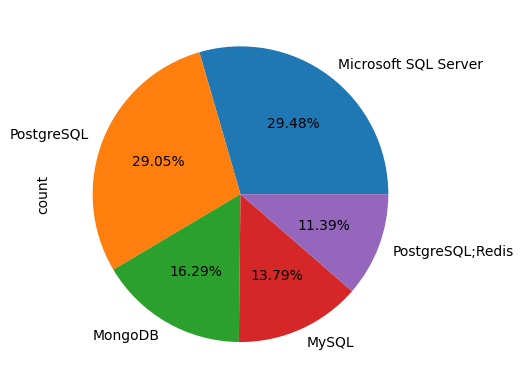

In [313]:
df.DatabaseDesireNextYear.value_counts().head().plot(kind='pie',autopct='%1.2f%%')

In [336]:
df_new=df[(df.Age>=30) & (df.Age<=35)]

In [337]:
df_new[['CodeRevHrs']].median()

CodeRevHrs    4.0
dtype: float64

In [339]:
dfnew=pd.DataFrame()

In [340]:
dfnew['WorkWeekHrs']=df_new[['WorkWeekHrs']].median()
dfnew['CodeRevHrs']=df_new['CodeRevHrs'].median()


In [341]:
dfnew

,WorkWeekHrs,CodeRevHrs
WorkWeekHrs,40.0,4.0


<Axes: >

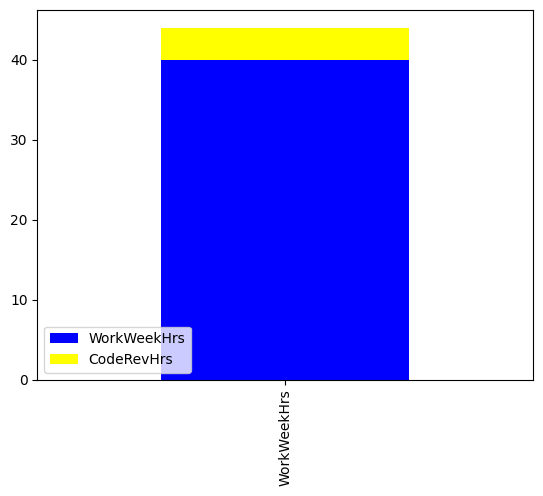

In [343]:
dfnew.plot(kind='bar',color=['Blue', 'Yellow'], stacked=True)

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
